In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from copy import copy

In [9]:
V_init=-50.
N_init=0.02

params=dict(V_1=[30.0], V_2=[15.0], V_3=[0.0], V_4=[30.0], 
            phi=[0.025],C=[6],
            E_L=[-50.0], E_Ca=[100.0], E_K=[-70.0],
            g_L=[0.5], g_Ca=[1.1], g_K=[2.0])

params_source = ColumnDataSource(data=dict(V_1=[30.0], V_2=[15.0], V_3=[0.0], V_4=[30.0], 
            phi=[0.025],C=[6],
            E_L=[-50.0], E_Ca=[100.0], E_K=[-70.0],
            g_L=[0.5], g_Ca=[1.1], g_K=[2.0]))

In [22]:
def ml_step(I_syn, V, N, dt, params=params):
    dt = dt*1e3
    V_1 = params['V_1'][0]
    V_2 = params['V_2'][0]
    V_3 = params['V_3'][0]
    V_4 = params['V_4'][0]
    phi = params['phi'][0]
    E_L = params['E_L'][0]
    E_Ca = params['E_Ca'][0]
    E_K = params['E_K'][0]

    g_L = params['g_L'][0]
    g_Ca = params['g_Ca'][0]
    g_K = params['g_K'][0]
    C = params['C'][0]
    
    dV = (I_syn - g_L*(V-E_L) - 0.5*g_Ca*(1+np.tanh((V-V_1)/V_2))*(V-E_Ca) - g_K*N*(V-E_K))/C
    dN = (0.5*(1+np.tanh((V-V_3)/V_4))-N)*(phi*np.cosh((V-V_3)/(2*V_4)))

    V1 = V + dV*dt
    N1 = N + dN*dt
    return [V1, N1]

In [23]:
dt = 1e-4
t = np.arange(0, 1, dt)

In [24]:
0.5/1e-4

5000.0

In [25]:
I_syn = np.zeros_like(t)
I_syn[2000:3000] = 5

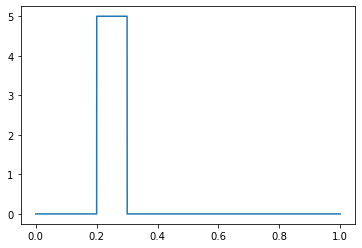

In [26]:
plt.plot(t, I_syn)

In [27]:
V = np.zeros_like(t)
N = np.zeros_like(t)
V[0] = V_init
N[0] = N_init

In [28]:
for i in range(len(t)):
    V_pre, _ = ml_step(I_syn[i], V[i], N[i], dt)
    if i < len(t)-1:
        V[i+1] = V_pre

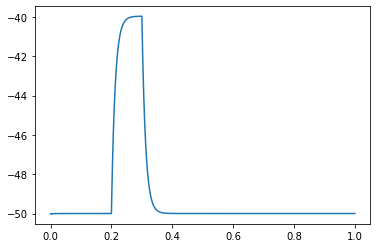

In [29]:
plt.plot(t, V)

In [53]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh.layouts import row, column
from bokeh.plotting import show, figure
from bokeh.models import ColumnDataSource, Slider

output_notebook()

Loading BokehJS ...

In [34]:
source = ColumnDataSource(data=dict(I=I_syn, V=V, t=t))

plot = figure(width=400, height=400)
plot.line('t', 'V', source=source, line_color='skyblue')

callback_V_1 = CustomJS(args=dict(source=source, params_source=params_source), code="""
    const data = source.data;
    const V_1 = cb_obj.value
    
    const V_2 = params_source.data['V_2'][0]
    
    const t = data['t']
    const V = data['V']
    
    console.log(V_2)
    
""")
slider = Slider(start=0.1, end=4, value=1, step=.1, title="power")
slider.js_on_change('value', callback_V_1)

layout = column(slider, plot)

show(layout)

In [ ]:
x = [x*0.005 for x in range(0, 200)]
y = x

source = ColumnDataSource(data=dict(x=x, y=y))

plot = Figure(width=400, height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source, params=params), code="""
    const data = source.data;
    const f = cb_obj.value
    const x = data['x']
    const y = data['y']
    for (let i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], f)
    }
    source.change.emit();
""")

slider = Slider(start=0.1, end=4, value=1, step=.1, title="power")
slider.js_on_change('value', callback)

layout = column(slider, plot)

show(layout)

In [31]:
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, CustomJS, Slider
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

x = [x*0.005 for x in range(0, 200)]
y = x

source = ColumnDataSource(data=dict(x=x, y=y))

plot = Figure(width=400, height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
    const data = source.data;
    const f = cb_obj.value
    const x = data['x']
    const y = data['y']
    for (let i = 0; i < x.length; i++) {
        y[i] = x[i]**f
    }
    source.change.emit();
""")

slider = Slider(start=0.1, end=4, value=1, step=.1, title="power")
slider.js_on_change('value', callback)

layout = column(slider, plot)

show(layout)

Loading BokehJS ...